# An introduction to Gaussian process regression
<b>Developed by</b> Elias Anderssen Dalan <a href="mailto:ceadyy@gmail.com">✉️</a>, supported by Centre for Computing in Science Education and Hylleraas Centre for Quantum Molecular Sciences.

### Things you might need to know before tackling this notebook:
<ul>
  <li><a href="https://audunsh.github.io/openworld/polynomial_regression/">Notebook on polynomial regression </a></li>
  <li><a href="https://audunsh.github.io/openworld/Covariance/">Notebook on covariance</a></li>
  <li><a href="https://audunsh.github.io/openworld/Kernels/">Notebook on kernels</a></li>
</ul>

A major problem when doing regression on some dataset where the corresponding output does not necessarily have a closed form (ex. a quadratic function) is choosing the appropriate approximation. As mentioned in the notebook about polynomial regression each model carries with them an inductive bias. Gaussian process regression (GPR) is a versatile type of regression, which lets go of many restrictions by letting the data speak more for itself.

The principle assumption of Gaussian procceses (GPs) is that our data is distributed as a multivariate Gaussian distribution. This might seem odd at first, but this means that we are not only able to obtain a prediction, but also the uncertainty of our model! This is extremely valuable when doing any sort of research where error estimates are important, like when modeling a chemical system or making stock predictions. 

This notebook will show you how to use btjenesten's gpr module to create a regressor, and how to use it to predict a function created from some training data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from btjenesten import gpr
from btjenesten import kernels as knls

In [10]:
x_pred = np.linspace(-5, 5, 200) #x-values where regressor and true function should be evaluated (for plotting purposes)
x_train = np.linspace(-5, 5, 13) #x-values where regressor should be trained

f = lambda x: np.exp(-(x-1)**2) + np.exp(-(x+1)**2)

x_train_gpr = x_train.reshape(-1, 1) #The data is one-dimensional, so it has to be reshaped
y_train_gpr = f(x_train_gpr)

regressor = gpr.Regressor(x_train_gpr, y_train_gpr) #Fitting the regressor to the training data

y_pred, variance = regressor.predict(x_pred, return_variance=True) #Using the regressor to predict y-values and variances

std = np.sqrt(variance) #

In [11]:
plt.figure(figsize=(19, 6), dpi=1000)
plt.subplot(1, 3, 1)
plt.title("True function")
plt.plot(x_pred, f(x_pred), color="black", label="f(x)")
plt.grid()
plt.legend()
plt.subplot(1, 3, 2)
plt.title("Datapoints measured")
plt.scatter(x_train, f(x_train), color="red", label="Measured data")
plt.grid()
plt.legend()
plt.subplot(1, 3, 3)
plt.title("Predicted function")
plt.plot(x_pred, y_pred, color="yellow", label="Predicted f(x)")
plt.scatter(x_train, f(x_train), color="red", label="Measured points", zorder=10)
plt.plot(x_pred, f(x_pred), linewidth=4, label="f(x)", zorder=-10, color="black")
plt.fill_between(x_pred, y_pred - std, y_pred + std, alpha=.4, label="Predicted f(x)$\pm$ std")
plt.grid()
plt.legend()

plt.show()

## A closer look at the predicted function and the error between our predicted function and the true $f(x)$:

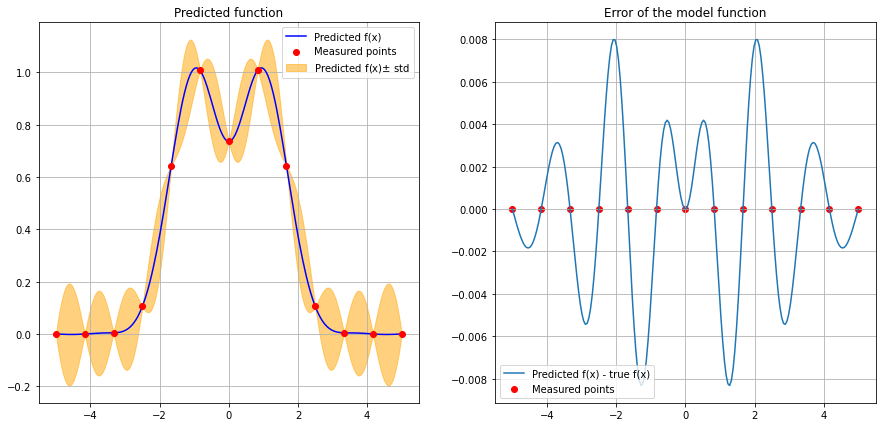

In [12]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Predicted function")
plt.plot(x_pred, y_pred, color="blue", label="Predicted f(x)")
plt.scatter(x_train, f(x_train), color="red", label="Measured points", zorder=10)
plt.fill_between(x_pred, y_pred - std, y_pred + std, alpha=.5, label="Predicted f(x)$\pm$ std", color="orange")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Error of the model function")
y_train_pred = regressor.predict(x_train)
y_train_true = f(x_train)
plt.plot(x_pred, y_pred - f(x_pred), label="Predicted f(x) - true f(x)")
plt.scatter(x_train, y_train_pred - y_train_true, color="red", label="Measured points")
plt.legend()
plt.grid()

plt.show()